# Model performance figures

In [1]:
import numpy as np
import pandas as pd
from itertools import islice
from ast import literal_eval
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Rectangle
%matplotlib inline
plt.rcParams.update({'font.size': 14})

**NOTE**: Need to go back and replace the reported performance figures from the original domains with performance figures that I generate using my own performance evaluation script. This is because (1) the reported figures have no CI, and (2) for relations, the models are evaluated in their original domains with strictness for type and direction, whereas my script is much more generous, so the comparison of scores isn't fair (the models will perform better in their own domains with my script). 

## Read in data

### DyGIE++

In [2]:
dygiepp_perf = pd.read_csv('../data/straying_off_topic_data/model_output/dygiepp/FINAL_PERF_30Jan2023/performance/FINAL_PERF_30Jan2023_model_performance.csv')

In [3]:
dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,FINAL_PERF_30Jan2023_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449395,0.629838,0.524166,0.060356,0.081679,0.068863,"(0.39952421816214206, 0.4972694212060275)","(0.5899923605805959, 0.6653179443640087)","(0.4802061830617212, 0.5626506182238207)","(0.032943833909250556, 0.09083877440166722)","(0.04951459816064331, 0.1151237442922374)","(0.040317896021021024, 0.09854438574072888)"
1,FINAL_PERF_30Jan2023_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.549929,0.196717,0.289091,NaN,NaN,NaN,"(0.4812081894691411, 0.6132837895268834)","(0.14854674805459772, 0.24519995795199953)","(0.22948294892781693, 0.3436515502595911)",NaN,NaN,NaN
2,FINAL_PERF_30Jan2023_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.185745,0.065554,0.096767,0.000000,0.000000,0.000000,"(0.13618077324973876, 0.241796522131888)","(0.04735467816854678, 0.0875510329060178)","(0.07067491659775883, 0.12760717311257058)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
3,FINAL_PERF_30Jan2023_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.601145,0.181691,0.278256,NaN,NaN,NaN,"(0.5264540816326531, 0.6740859683794466)","(0.13135091730963727, 0.23080999465319746)","(0.2124211353905904, 0.3418118858551797)",NaN,NaN,NaN
4,FINAL_PERF_30Jan2023_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.447384,0.632159,0.523551,0.050105,0.072931,0.059107,"(0.39379188764564277, 0.49617466595862075)","(0.5921696161681673, 0.672571243523316)","(0.4791500214010558, 0.5661841644466241)","(0.029618422339593112, 0.0727132443859439)","(0.045129778672032196, 0.10257670039096307)","(0.03593812193430906, 0.08424521871788353)"


In [4]:
dygiepp_perf['model_name'] = 'DyGIE++ ' + dygiepp_perf['pred_file'].str.split('_').str[5]

In [5]:
dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,FINAL_PERF_30Jan2023_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449395,0.629838,0.524166,0.060356,0.081679,0.068863,"(0.39952421816214206, 0.4972694212060275)","(0.5899923605805959, 0.6653179443640087)","(0.4802061830617212, 0.5626506182238207)","(0.032943833909250556, 0.09083877440166722)","(0.04951459816064331, 0.1151237442922374)","(0.040317896021021024, 0.09854438574072888)",DyGIE++ scierc-lightweight
1,FINAL_PERF_30Jan2023_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.549929,0.196717,0.289091,NaN,NaN,NaN,"(0.4812081894691411, 0.6132837895268834)","(0.14854674805459772, 0.24519995795199953)","(0.22948294892781693, 0.3436515502595911)",NaN,NaN,NaN,DyGIE++ genia
2,FINAL_PERF_30Jan2023_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.185745,0.065554,0.096767,0.000000,0.000000,0.000000,"(0.13618077324973876, 0.241796522131888)","(0.04735467816854678, 0.0875510329060178)","(0.07067491659775883, 0.12760717311257058)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",DyGIE++ ace05-relation
3,FINAL_PERF_30Jan2023_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.601145,0.181691,0.278256,NaN,NaN,NaN,"(0.5264540816326531, 0.6740859683794466)","(0.13135091730963727, 0.23080999465319746)","(0.2124211353905904, 0.3418118858551797)",NaN,NaN,NaN,DyGIE++ genia-lightweight
4,FINAL_PERF_30Jan2023_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.447384,0.632159,0.523551,0.050105,0.072931,0.059107,"(0.39379188764564277, 0.49617466595862075)","(0.5921696161681673, 0.672571243523316)","(0.4791500214010558, 0.5661841644466241)","(0.029618422339593112, 0.0727132443859439)","(0.045129778672032196, 0.10257670039096307)","(0.03593812193430906, 0.08424521871788353)",DyGIE++ scierc


#### Add performances computed on original domain datasets

In [6]:
orig_dygiepp_perf_scierc = pd.read_csv('../data/straying_off_topic_data/model_output/original_datasets/performance/dygiepp_scierc_original_perf_job_model_performance.csv')
orig_dygiepp_perf_genia = pd.read_csv('../data/straying_off_topic_data/model_output/original_datasets/performance/dygiepp_genia_original_perf_job_model_performance.csv')

In [7]:
orig_dygiepp_perf_scierc['model_name'] = 'DyGIE++ ' + orig_dygiepp_perf_scierc['pred_file'].str.split('_').str[6]

In [8]:
orig_dygiepp_perf_scierc.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,dygiepp_scierc_original_perf_job_test_scierc_p...,test.json,0.794354,0.817202,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)",DyGIE++ scierc
1,dygiepp_scierc_original_perf_job_test_scierc-l...,test.json,0.781797,0.813631,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)",DyGIE++ scierc-lightweight


In [9]:
orig_dygiepp_perf_genia['model_name'] = 'DyGIE++ ' + orig_dygiepp_perf_genia['pred_file'].str.split('_').str[6]

In [10]:
orig_dygiepp_perf_genia.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,dygiepp_genia_original_perf_job_test_genia-lig...,test.json,0.844062,0.752728,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN,DyGIE++ genia-lightweight
1,dygiepp_genia_original_perf_job_test_genia_pre...,test.json,0.817575,0.776577,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN,DyGIE++ genia


In [11]:
orig_dygiepp_perf = pd.concat([orig_dygiepp_perf_genia, orig_dygiepp_perf_scierc])
orig_dygiepp_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,dygiepp_genia_original_perf_job_test_genia-lig...,test.json,0.844062,0.752728,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN,DyGIE++ genia-lightweight
1,dygiepp_genia_original_perf_job_test_genia_pre...,test.json,0.817575,0.776577,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN,DyGIE++ genia
0,dygiepp_scierc_original_perf_job_test_scierc_p...,test.json,0.794354,0.817202,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)",DyGIE++ scierc
1,dygiepp_scierc_original_perf_job_test_scierc-l...,test.json,0.781797,0.813631,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)",DyGIE++ scierc-lightweight


In [12]:
all_dygiepp_perf = pd.merge(dygiepp_perf, orig_dygiepp_perf, how='outer', on='model_name', suffixes=('_pickle', '_original'))
all_dygiepp_perf.head()

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
0,FINAL_PERF_30Jan2023_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449395,0.629838,0.524166,0.060356,0.081679,0.068863,"(0.39952421816214206, 0.4972694212060275)","(0.5899923605805959, 0.6653179443640087)",...,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)"
1,FINAL_PERF_30Jan2023_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.549929,0.196717,0.289091,NaN,NaN,NaN,"(0.4812081894691411, 0.6132837895268834)","(0.14854674805459772, 0.24519995795199953)",...,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN
2,FINAL_PERF_30Jan2023_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.185745,0.065554,0.096767,0.000000,0.000000,0.000000,"(0.13618077324973876, 0.241796522131888)","(0.04735467816854678, 0.0875510329060178)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FINAL_PERF_30Jan2023_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.601145,0.181691,0.278256,NaN,NaN,NaN,"(0.5264540816326531, 0.6740859683794466)","(0.13135091730963727, 0.23080999465319746)",...,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN
4,FINAL_PERF_30Jan2023_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.447384,0.632159,0.523551,0.050105,0.072931,0.059107,"(0.39379188764564277, 0.49617466595862075)","(0.5921696161681673, 0.672571243523316)",...,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)"


In [13]:
# Common-sense check to make sure the merge worked
all_dygiepp_perf[['model_name', 'ent_F1_pickle', 'ent_F1_original', 'rel_F1_pickle', 'rel_F1_original']]

,model_name,ent_F1_pickle,ent_F1_original,rel_F1_pickle,rel_F1_original
0,DyGIE++ scierc-lightweight,0.524166,0.797359,0.068863,0.528572
1,DyGIE++ genia,0.289091,0.796528,NaN,NaN
2,DyGIE++ ace05-relation,0.096767,NaN,0.000000,NaN
3,DyGIE++ genia-lightweight,0.278256,0.795757,NaN,NaN
4,DyGIE++ scierc,0.523551,0.805579,0.059107,0.515473


### PURE

In [14]:
pure_perf = pd.read_csv('../data/straying_off_topic_data/model_output/pure/FINAL_PERF_31Jan2023/performance/combined_FINAL_PERF_31Jan2023_model_performance.csv')

In [15]:
pure_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,combined_FINAL_PERF_31Jan2023_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.276069,0.043263,0.074739,0.000000,0.000000,0.000000,"(0.21167306871532224, 0.35240977112676053)","(0.03261227861086806, 0.05504705065579959)","(0.05689644813995963, 0.09421429728916357)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)"
1,combined_FINAL_PERF_31Jan2023_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.516198,0.693383,0.591492,0.035341,0.036689,0.035798,"(0.462119468848851, 0.5675877991093307)","(0.6635945422456213, 0.7233291116895635)","(0.5508930765636941, 0.6325293588857706)","(0.014223957254291675, 0.05914013852352568)","(0.014330866481652792, 0.06263729079497907)","(0.014326347305389222, 0.05927556753190142)"


In [16]:
pure_perf['model_name'] = 'PURE ' + pure_perf['pred_file'].str.split('_').str[5]

In [17]:
pure_perf.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI,model_name
0,combined_FINAL_PERF_31Jan2023_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.276069,0.043263,0.074739,0.000000,0.000000,0.000000,"(0.21167306871532224, 0.35240977112676053)","(0.03261227861086806, 0.05504705065579959)","(0.05689644813995963, 0.09421429728916357)","(0.0, 0.0)","(0.0, 0.0)","(0.0, 0.0)",PURE ace05
1,combined_FINAL_PERF_31Jan2023_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.516198,0.693383,0.591492,0.035341,0.036689,0.035798,"(0.462119468848851, 0.5675877991093307)","(0.6635945422456213, 0.7233291116895635)","(0.5508930765636941, 0.6325293588857706)","(0.014223957254291675, 0.05914013852352568)","(0.014330866481652792, 0.06263729079497907)","(0.014326347305389222, 0.05927556753190142)",PURE scierc


#### Add the original model performances

In [18]:
orig_pure_perf_scierc = pd.read_csv('../data/straying_off_topic_data/model_output/original_datasets/performance/combined_pure_scierc_orig_perf_model_performance.csv')
orig_pure_perf_scierc.head()

,pred_file,gold_std_file,ent_precision,ent_recall,ent_F1,rel_precision,rel_recall,rel_F1,ent_precision_CI,ent_recall_CI,ent_F1_CI,rel_precision_CI,rel_recall_CI,rel_F1_CI
0,combined_pure_scierc_orig_perf_pure_scierc_rel...,test.json,0.780635,0.810688,0.795343,0.562873,0.479972,0.5179,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"


In [19]:
orig_pure_perf_scierc['model_name'] = 'PURE ' + orig_pure_perf_scierc['pred_file'].str.split('_').str[6]

In [20]:
all_pure_perf = pd.merge(pure_perf, orig_pure_perf_scierc, how='outer', on='model_name', suffixes=('_pickle', '_original'))
all_pure_perf.head()

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
0,combined_FINAL_PERF_31Jan2023_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.276069,0.043263,0.074739,0.000000,0.000000,0.000000,"(0.21167306871532224, 0.35240977112676053)","(0.03261227861086806, 0.05504705065579959)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,combined_FINAL_PERF_31Jan2023_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.516198,0.693383,0.591492,0.035341,0.036689,0.035798,"(0.462119468848851, 0.5675877991093307)","(0.6635945422456213, 0.7233291116895635)",...,0.795343,0.562873,0.479972,0.5179,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"


### Combine all performances

In [21]:
all_perf = pd.concat([all_dygiepp_perf, all_pure_perf]).reset_index(drop=True)
all_perf

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
0,FINAL_PERF_30Jan2023_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449395,0.629838,0.524166,0.060356,0.081679,0.068863,"(0.39952421816214206, 0.4972694212060275)","(0.5899923605805959, 0.6653179443640087)",...,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)"
1,FINAL_PERF_30Jan2023_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.549929,0.196717,0.289091,NaN,NaN,NaN,"(0.4812081894691411, 0.6132837895268834)","(0.14854674805459772, 0.24519995795199953)",...,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN
2,FINAL_PERF_30Jan2023_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.185745,0.065554,0.096767,0.000000,0.000000,0.000000,"(0.13618077324973876, 0.241796522131888)","(0.04735467816854678, 0.0875510329060178)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FINAL_PERF_30Jan2023_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.601145,0.181691,0.278256,NaN,NaN,NaN,"(0.5264540816326531, 0.6740859683794466)","(0.13135091730963727, 0.23080999465319746)",...,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN
4,FINAL_PERF_30Jan2023_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.447384,0.632159,0.523551,0.050105,0.072931,0.059107,"(0.39379188764564277, 0.49617466595862075)","(0.5921696161681673, 0.672571243523316)",...,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)"
5,combined_FINAL_PERF_31Jan2023_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.276069,0.043263,0.074739,0.000000,0.000000,0.000000,"(0.21167306871532224, 0.35240977112676053)","(0.03261227861086806, 0.05504705065579959)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,combined_FINAL_PERF_31Jan2023_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.516198,0.693383,0.591492,0.035341,0.036689,0.035798,"(0.462119468848851, 0.5675877991093307)","(0.6635945422456213, 0.7233291116895635)",...,0.795343,0.562873,0.479972,0.517900,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"


In [22]:
all_perf = all_perf.set_index('model_name')
all_perf = all_perf.sort_values('ent_F1_pickle', ascending=False)

In [23]:
all_perf

,pred_file_pickle,gold_std_file_pickle,ent_precision_pickle,ent_recall_pickle,ent_F1_pickle,rel_precision_pickle,rel_recall_pickle,rel_F1_pickle,ent_precision_CI_pickle,ent_recall_CI_pickle,...,ent_F1_original,rel_precision_original,rel_recall_original,rel_F1_original,ent_precision_CI_original,ent_recall_CI_original,ent_F1_CI_original,rel_precision_CI_original,rel_recall_CI_original,rel_F1_CI_original
model_name,,,,,,,,,,,,,,,,,,,,,
PURE scierc,combined_FINAL_PERF_31Jan2023_pure_scierc_rel_...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.516198,0.693383,0.591492,0.035341,0.036689,0.035798,"(0.462119468848851, 0.5675877991093307)","(0.6635945422456213, 0.7233291116895635)",...,0.795343,0.562873,0.479972,0.517900,"(0.7573847251898802, 0.8035928873207288)","(0.7870258498492306, 0.832095491379181)","(0.7750324544114845, 0.8154307120989182)","(0.5164048066772235, 0.607697015289525)","(0.43654785685319925, 0.5231194331983806)","(0.47860092738370497, 0.5546735115441573)"
DyGIE++ scierc-lightweight,FINAL_PERF_30Jan2023_formatted_data_scierc-lig...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.449395,0.629838,0.524166,0.060356,0.081679,0.068863,"(0.39952421816214206, 0.4972694212060275)","(0.5899923605805959, 0.6653179443640087)",...,0.797359,0.618954,0.461536,0.528572,"(0.7594586571419857, 0.803306289256054)","(0.7893024086075972, 0.8351607132349486)","(0.7775144013852646, 0.8156444011875782)","(0.5722358660785887, 0.6635833236323087)","(0.41926930596285433, 0.5026881942662751)","(0.4894900585481012, 0.5628794604823015)"
DyGIE++ scierc,FINAL_PERF_30Jan2023_formatted_data_scierc_pre...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.447384,0.632159,0.523551,0.050105,0.072931,0.059107,"(0.39379188764564277, 0.49617466595862075)","(0.5921696161681673, 0.672571243523316)",...,0.805579,0.616616,0.443175,0.515473,"(0.7688669247379356, 0.8193968293753555)","(0.7899967712711505, 0.8421942101815175)","(0.7823772654360929, 0.8292615413042242)","(0.5732610337459475, 0.6614786807580174)","(0.4062389758179232, 0.4853477153924101)","(0.47920009874453384, 0.5554503819572163)"
DyGIE++ genia,FINAL_PERF_30Jan2023_formatted_data_genia_pred...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.549929,0.196717,0.289091,NaN,NaN,NaN,"(0.4812081894691411, 0.6132837895268834)","(0.14854674805459772, 0.24519995795199953)",...,0.796528,NaN,NaN,NaN,"(0.8029709413776704, 0.8305085770006524)","(0.7589261207961184, 0.7934460552448153)","(0.7828860605209547, 0.8095895439237504)",NaN,NaN,NaN
DyGIE++ genia-lightweight,FINAL_PERF_30Jan2023_formatted_data_genia-ligh...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.601145,0.181691,0.278256,NaN,NaN,NaN,"(0.5264540816326531, 0.6740859683794466)","(0.13135091730963727, 0.23080999465319746)",...,0.795757,NaN,NaN,NaN,"(0.8300141984583056, 0.8578769754598758)","(0.7350278369096913, 0.7698233031151941)","(0.7827790519165085, 0.8085886587740776)",NaN,NaN,NaN
DyGIE++ ace05-relation,FINAL_PERF_30Jan2023_formatted_data_ace05-rela...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.185745,0.065554,0.096767,0.000000,0.000000,0.000000,"(0.13618077324973876, 0.241796522131888)","(0.04735467816854678, 0.0875510329060178)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PURE ace05,combined_FINAL_PERF_31Jan2023_pure_ace05_rel_o...,FINAL_FOR_EVALUATION_ent_and_rel_all_gold_std_...,0.276069,0.043263,0.074739,0.000000,0.000000,0.000000,"(0.21167306871532224, 0.35240977112676053)","(0.03261227861086806, 0.05504705065579959)",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plots
We want to make bubble plots where the x-axis is entity performance, the y-axis is relation performance, and the size of the bubble is the standard deviation in each direction. I originally intended to color the bubbles by whether it's the performance on the original domain of the model, or the PICKLE corpus; however, this proved unhelpful because the bubbles for each group overlap to such a degree that they can't be usefully labeled. Instead, I'll generate a unique color for each model, using a lighter version of the color for the original domain performance and a darker color for the PICKLE performance, and make a legend. Models that have NA performance will be excluded and noted in the figure legend.
<br><br>
Since we have different standard deviations on each axis (one for entity performance and one for relation performance), we want to use an ellipse instead of a circle as the shape for each point. This means that we can't use the standard matplotlib way of building these plots, which just uses the `s` keyword to change the size of the bubble. We'll instead have to plot an ellipse for each point. The horizontal axis of the ellipse will be bounded by the confidence interval endpoints for entity performance, and the vertical axis will be the confidence interval endpoints for relation performance.

### F1

To set up the data for this plot, we need to get the 4 values required to plot an ellipse (cetner's x and y values, width and height), as well as the label for the point for each point, and its group (original or pickle). To do this easily, we'll make a dictionary, where the key is the label plus the group (to provide a unique identifier), and the value is a 4-tuple of the ellipse values.

In [24]:
def get_label(l):
    """
    Gets the shorthand label for the model.
    
    parameters:
        l, str: Full model name from all_perf index
        
    returns:
        short_l, str: Shorthand model name
    """
    arc = l.split()[0]
    # Get model architecture shorthand
    if arc == 'DyGIE++':
        arc = 'D'
    elif arc == 'PURE':
        arc = 'P'
    mod = l.split()[1]
    
    try:
        # Get the model's dataset name
        mod_n = mod.split('-')[0]
        if mod_n == 'scierc':
            mod_n = 'S'
        elif mod_n == 'genia':
            mod_n = 'G'
        elif mod_n == 'ace05':
            mod_n = 'A'
            
        # Add asterisk for lightweight model
        mod_t = mod.split('-')[1]
        if mod_t == 'lightweight':
            mod_t = '*'
        else: mod_t = ''
    
        # Make label
        new_l = f'{arc} | {mod_n}{mod_t}'
        
    except IndexError:
        
        # Get the correct name
        if mod == 'scierc':
            mod = 'S'
        elif mod == 'genia':
            mod = 'G'
        elif mod == 'ace05':
            mod = 'A'

        new_l = f'{arc} | {mod}'
        
    return new_l

In [25]:
def get_interval_distance(i):
    """
    Get the width or height from a CI.
    
    parameters:
        i: CI value from df
        
    returns:
        dist, float: a number if the interval exists, np.nan otherwise
    """
    try:
        len(i) == 2
        dist = literal_eval(i)[1] - literal_eval(i)[0]
    except TypeError:
        dist = np.nan
        
    return dist

In [26]:
def get_ellipse_values(perf_df, model_idx, metric, mode):
    """
    Get the x, y, width and height for an ellipse.
    
    parameters:
        perf_df, df: dataframe containing performance values
        model_idx, str: name of the row to be used
        metric, str: "F1", "precision", or "recall", determines which metric for which
            to obtain an ellipse
        mode, str: "original" or "pickle", determines which of the performances
            for the given metric should be used
    
    returns:
        ellipse_tup, tuple of floats: (x, y, width, height) if there is performance for 
            both entities and relations, (x, NaN, width, NaN) if there is no relation performance,
            "EXCLUDE" if there is no performance for either.
    """
    # Get the names of the columns we care about
    x_col_name = f'ent_{metric}_{mode}'
    y_col_name = f'rel_{metric}_{mode}'
    x_CI_col_name = f'ent_{metric}_CI_{mode}'
    y_CI_col_name = f'rel_{metric}_CI_{mode}'
    
    # Get the x and y values for the center of the ellipse
    x = perf_df.loc[model_idx, x_col_name]
    y = perf_df.loc[model_idx, y_col_name]
    
    # Get the width and height
    width = get_interval_distance(perf_df.loc[model_idx, x_CI_col_name])
    height = get_interval_distance(perf_df.loc[model_idx, y_CI_col_name])
    
    ellipse_tup = (x, y, width, height)
    
    ellipse_ser = pd.Series(ellipse_tup)
    all_nan = ellipse_ser.isnull().values.all()
    if all_nan:
        ellipse_tup = 'EXCLUDE'
        
    return ellipse_tup
    

In [27]:
# Generate dictionary entries
f1_full_entries = {}
f1_partial_entries = {}
f1_exclude_names = []
for i, l in enumerate(all_perf.index.values):
    
    # Get the main part of the label
    new_l = get_label(l)
    
    # Get ellipse values and add color indicator to label
    for indicator in ['PICKLE', 'Original']:
        ellipse_tup = get_ellipse_values(all_perf, l, "F1", indicator.lower())
        final_l = new_l + ' | ' + indicator
        if not isinstance(ellipse_tup, str):
            if np.nan not in ellipse_tup:
                f1_full_entries[final_l] = ellipse_tup
            elif np.nan in ellipse_tup:
                f1_partial_entries[final_l] = ellipse_tup
        else:
            f1_exclude_names.append(final_l)

In [28]:
f1_full_entries.keys()

dict_keys(['P | S | PICKLE', 'P | S | Original', 'D | S* | PICKLE', 'D | S* | Original', 'D | S | PICKLE', 'D | S | Original', 'D | A | PICKLE', 'P | A | PICKLE'])

In [29]:
# Ensure that smallest green bubble gets laid on top
full_laydown_order = ['P | S | PICKLE', 'P | S | Original', 'D | S | Original', 'D | S* | PICKLE', 'D | S* | Original', 'D | A | PICKLE', 'P | A | PICKLE', 'D | S | PICKLE']

Now we can make our plot! I'm going to make a 1-D numberline under the main plot to put models that don't have relation performance but that do have entity performance, in order to avoid confusing 0 relation performance with not having relation peformance at all. I'm going to manually define the colors in a dictionary to make sure that they make sense semantically.

In [30]:
full_entry_colors = {'P | S': 'royalblue',
                     'D | S': 'forestgreen',
                     'D | S*': 'mediumorchid',
                     'D | A': 'coral',
                     'P | A': 'yellow',
                     'D | G': 'red',
                     'D | G*': 'blue'}

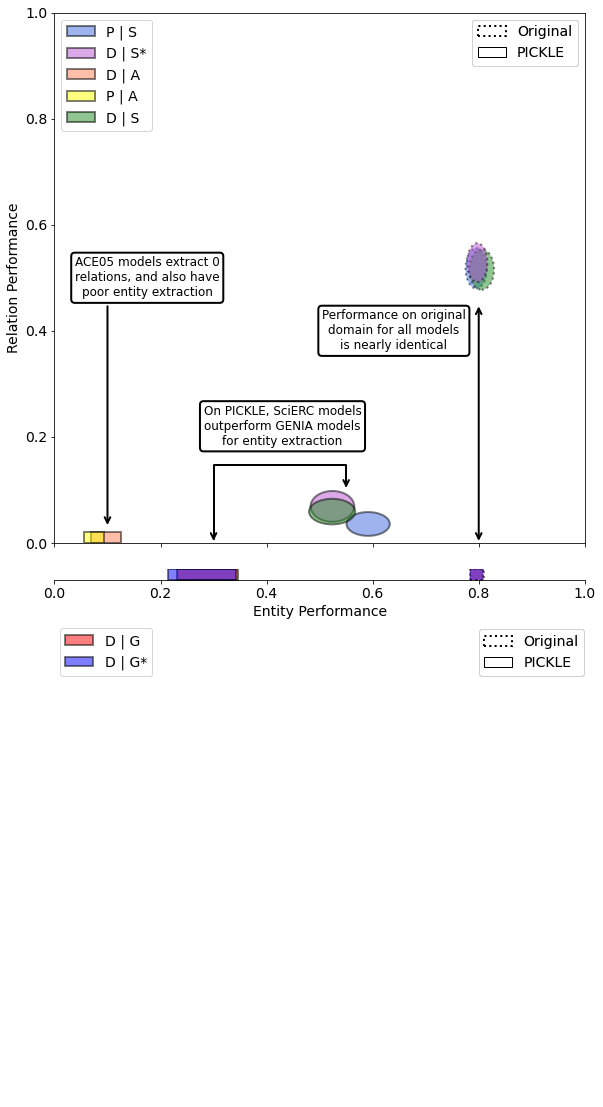

In [31]:
fig, axs = plt.subplots(2, subplot_kw={'aspect': 'equal'}, figsize=(20, 20), sharex=True)
fig.subplots_adjust(hspace=0.05)

######################### Make 2D plot for models with both values ##############################
for label in full_laydown_order:
    
    # Get ellipse
    ell_tup = f1_full_entries[label]
    # Get color & linestyle
    color_label = ' | '.join(label.split(' | ')[:-1])
    color = full_entry_colors[color_label]
    if label.split(' | ')[-1] == 'Original':
        linestyle = ':'
    else:
        linestyle = '-'
        
    # If the relation performance and CI are zero, need to make a thin rectangle instead of an ellipse
    if 0 in ell_tup:
        rect_x = ell_tup[0] - 0.5*ell_tup[2]
        shape = Rectangle((rect_x, 0), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                          linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=2,
                        linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    
    # Add shape to axis
    axs[0].add_artist(shape)

axs[0].set_ylabel('Relation Performance')

# Keep only the solid line version of each model/training set combination
ellipses, labels = axs[0].get_legend_handles_labels()
keep_labs, keep_ells = [], []
for lab, ell in zip(full_laydown_order, ellipses):
    if lab not in keep_labs and 'PICKLE' in lab:
        keep_labs.append(lab)
        keep_ells.append(ell)
legend1 = axs[0].legend(handles=keep_ells, loc='upper left')
# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip([':', '-'], ['Original', 'PICKLE']):
    dummy_lines.append(Ellipse((0, 0), 0, 0, edgecolor="black", linewidth=2, linestyle=linestyle, label=label,
                              facecolor='white'))
legend2 = axs[0].legend(dummy_lines, ['Original', 'PICKLE'])
for legobj in legend2.legendHandles:
    if legobj._label == 'PICKLE':
        legobj.set_linewidth(1)
axs[0].add_artist(legend1)
axs[0].add_artist(legend2)

####################################### Make 1D plot for GENIA models ##################################
# axs[1].axhline(0.75, 0, 1, color='black')
axs[1].spines['bottom'].set_position(('axes', 0.98))
axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')
axs[1].spines['left'].set_color('none')
axs[1].set_yticks([])
axs[1].set_xlabel('Entity Performance')

for label, ell_tup in f1_partial_entries.items():
    
    # Get color & linestyle
    color_label = ' | '.join(label.split(' | ')[:-1])
    color = full_entry_colors[color_label]
    if label.split(' | ')[-1] == 'Original':
        linestyle = ':'
    else:
        linestyle = '-'
    
    # Make rectangle
    rect_x = ell_tup[0] - 0.5*ell_tup[2]
    shape = Rectangle((rect_x, 0.98), ell_tup[2], 0.02, edgecolor='black', linewidth=2,
                      linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)

    # Add shape to axis
    axs[1].add_artist(shape)

# Keep only the solid line version of each model/training set combination
rects, labels = axs[1].get_legend_handles_labels()
keep_labs, keep_rects = [], []
for lab, rec in zip(labels, rects):
    if lab not in keep_labs:
        keep_labs.append(lab)
        keep_rects.append(rec)
legend1 = axs[1].legend(handles=keep_rects, loc=(0.01,0.8))
# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip([':', '-'], ['Original', 'PICKLE']):
    dummy_lines.append(Ellipse((0, 0), 0, 0, edgecolor="black", linewidth=2, linestyle=linestyle, label=label,
                              facecolor='white'))
legend2 = axs[1].legend(dummy_lines, ['Original', 'PICKLE'], loc=(0.8,0.8))
for legobj in legend2.legendHandles:
    if legobj._label == 'PICKLE':
        legobj.set_linewidth(1)
axs[1].add_artist(legend1)
axs[1].add_artist(legend2)

############################################### Annotate plot #######################################
orig_text = 'Performance on original\ndomain for all models\nis nearly identical'
pick_text = 'On PICKLE, SciERC models\noutperform GENIA models\nfor entity extraction'
ace_text = 'ACE05 models extract 0\nrelations, and also have\npoor entity extraction'

axs[0].annotate('', xy=(0.8, 0), xytext=(0.8,0.45), arrowprops=dict(arrowstyle='<->', lw=2))
axs[0].text(
    0.64, 0.4, orig_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

axs[0].annotate('', xy=(0.3, 0), xycoords='data',
            xytext=(0.55, 0.1), textcoords='data',
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="bar,angle=360,fraction=-0.2", lw=2))
axs[0].text(
    0.43, 0.22, pick_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

axs[0].annotate('', xy=(0.1, 0.03), xytext=(0.1,0.45), arrowprops=dict(arrowstyle='->', lw=2))
axs[0].text(
    0.175, 0.5, ace_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

plt.savefig('../data/straying_off_topic_data/model_performance/bubbleplot_F1.png', bbox_inches='tight', dpi=600)

#### Traditional bar plot representation

In [32]:
def get_intervals_w_nan(CIs):
    """
    Gets list of intervals for lists that have NaN values.
    
    parameters:
        CIs, list of tuple & nan: confidence intervals
    
    returns:
        intervals, list of float: interval distances
    """
    intervals = []
    for i in CIs:
        try:
            len(i) == 2
            interv = literal_eval(i)[1] - literal_eval(i)[0]
        except TypeError:
            interv = 0

        intervals.append(interv)
    return intervals

In [33]:
pickle_ent_intervals = [literal_eval(i)[1] - literal_eval(i)[0] for i in all_perf.ent_F1_CI_pickle]
orig_ent_intervals = get_intervals_w_nan(all_perf.ent_F1_CI_original)
pickle_rel_intervals = get_intervals_w_nan(all_perf.rel_F1_CI_pickle)
orig_rel_intervals = get_intervals_w_nan(all_perf.rel_F1_CI_original)

In [34]:
# Format labels
labels = []
for i, l in enumerate(all_perf.index.values):

    arc = l.split()[0]
    # Get model architecture shorthand
    if arc == 'DyGIE++':
        arc = 'D'
    elif arc == 'PURE':
        arc = 'P'
    mod = l.split()[1]
    
    try:
        # Get the model's dataset name
        mod_n = mod.split('-')[0]
        if mod_n == 'scierc':
            mod_n = 'S'
        elif mod_n == 'genia':
            mod_n = 'G'
        elif mod_n == 'ace05':
            mod_n = 'A'
            
        # Add asterisk for lightweight model
        mod_t = mod.split('-')[1]
        if mod_t == 'lightweight':
            mod_t = '*'
        else: mod_t = ''
    
        # Make label
        l = f'{arc}\n{mod_n}{mod_t}'
        
    except IndexError:
        
        # Get the correct name
        if mod == 'scierc':
            mod = 'S'
        elif mod == 'genia':
            mod = 'G'
        elif mod == 'ace05':
            mod = 'A'

        l = f'{arc}\n{mod}'
     
    labels.append(l)

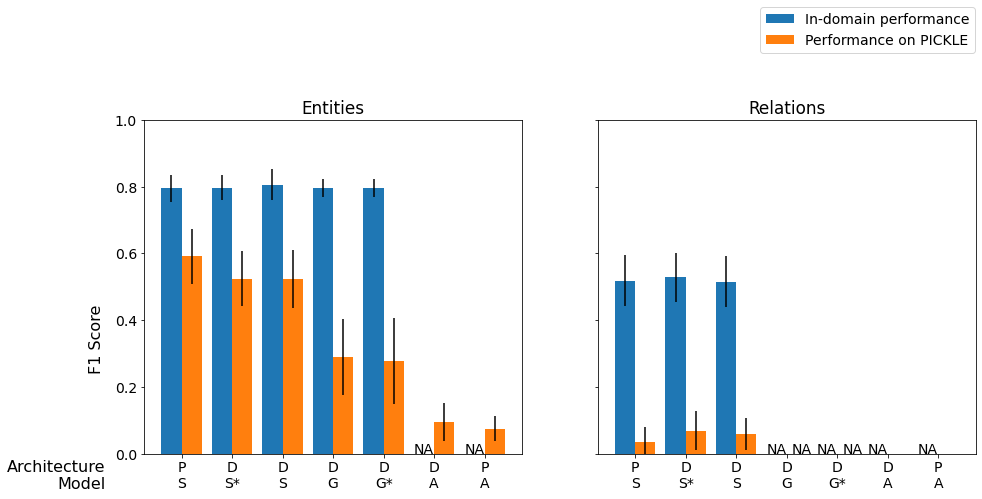

In [35]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_F1_original, 0.4, yerr=orig_ent_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_F1_pickle, 0.4, yerr=pickle_ent_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))
        
axs[1].bar(X_axis - 0.2, all_perf.rel_F1_original, 0.4, yerr=orig_rel_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_F1_pickle, 0.4, yerr=pickle_rel_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))
    
plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("F1 Score", fontsize=16)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_F1_w_errorbars.png', bbox_inches='tight', dpi=600)

### Precision & recall combined plot
In the spirit of the bubbleplot F1 figure, here we'll make a similar figure, excpept where the x and y axes are precision and recall, respectively. Here, I'll only include the model performance on the PICKLE dataset (leaving out the performance on the original dataset), as well as only making this plot for entities for GENIA and SciERC (since we're using it to compare SciERC and GENIA, and GENIA doesn't have relation performance). I'll use color to indicate the dataset the model was trained on, and the linestyle to indicate the model architecture.

In [36]:
all_perf.index.values

array(['PURE scierc', 'DyGIE++ scierc-lightweight', 'DyGIE++ scierc',
       'DyGIE++ genia', 'DyGIE++ genia-lightweight',
       'DyGIE++ ace05-relation', 'PURE ace05'], dtype=object)

In [37]:
def get_ellipse_values_precrec(perf_df, model_idx, mode):
    """
    Get the x, y, width and height for an ellipse where the x axis is precision, and
    the y axis is recall.
    
    parameters:
        perf_df, df: dataframe containing performance values
        model_idx, str: name of the row to be used
        mode, str: "original" or "pickle", determines which of the performances
            for the given metric should be used
    
    returns:
        ellipse_tup, tuple of floats: (x, y, width, height) if there is performance for 
            both entities and relations, (x, NaN, width, NaN) if there is no relation performance,
            "EXCLUDE" if there is no performance for either.
    """
    # Get the names of the columns we care about
    x_col_name = f'ent_precision_{mode}'
    y_col_name = f'ent_recall_{mode}'
    x_CI_col_name = f'ent_precision_CI_{mode}'
    y_CI_col_name = f'ent_recall_CI_{mode}'
    
    # Get the x and y values for the center of the ellipse
    x = perf_df.loc[model_idx, x_col_name]
    y = perf_df.loc[model_idx, y_col_name]
    
    # Get the width and height
    width = get_interval_distance(perf_df.loc[model_idx, x_CI_col_name])
    height = get_interval_distance(perf_df.loc[model_idx, y_CI_col_name])
    
    ellipse_tup = (x, y, width, height)
        
    return ellipse_tup
    

In [38]:
# Generate dictionary entries
precrec_entries = {}
for i, l in enumerate(all_perf.index.values):
    
    # I only want SciERC and GENIA
    if ('scierc' in l) or ('genia' in l):
        # Get the main part of the label
        new_l = get_label(l)

        # Get ellipse values and add color indicator to label
        indicator = 'PICKLE'
        ellipse_tup = get_ellipse_values_precrec(all_perf, l, indicator.lower())
        final_l = new_l + ' | ' + indicator
        precrec_entries[final_l] = ellipse_tup

In [39]:
precrec_colors = {'SciERC': '#440154FF',
                     'GENIA': '#2A788EFF'}

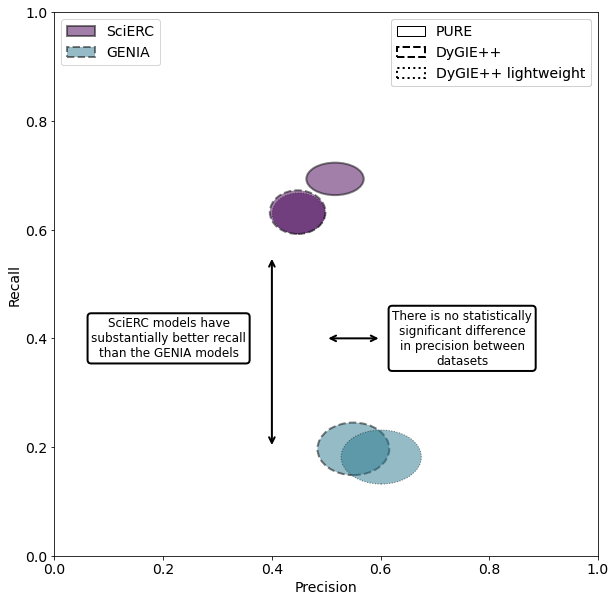

In [40]:
fig, ax = plt.subplots(1, subplot_kw={'aspect': 'equal'}, figsize=(10, 10), sharex=True)
fig.subplots_adjust(hspace=0.05)

######################### Make 2D plot for models with both values ##############################
for label in precrec_entries.keys():
    
    # Get ellipse
    ell_tup = precrec_entries[label]
    # Get color & linestyle
    color_label = ' | '.join(label.split(' | ')[:-1])
    if 'S' in color_label:
        color_label = 'SciERC'
    else:
        color_label = 'GENIA'
    color = precrec_colors[color_label]
    if label.split(' | ')[0] == 'P':
        linestyle = '-'
        lw=2
    elif (label.split(' | ')[0] == 'D') and not (label.split(' | ')[1][-1] == '*'):
        linestyle = 'dashed'
        lw=2
    elif (label.split(' | ')[0] == 'D') and (label.split(' | ')[1][-1] == '*'):
        linestyle = 'dotted'
        lw=1
    
        
    # If the relation performance and CI are zero, need to make a thin rectangle instead of an ellipse
    if 0 in ell_tup:
        rect_x = ell_tup[0] - 0.5*ell_tup[2]
        shape = Rectangle((rect_x, 0), ell_tup[2], 0.02, edgecolor='black', linewidth=lw,
                          linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    else:
        shape = Ellipse((ell_tup[0], ell_tup[1]), ell_tup[2], ell_tup[3], edgecolor='black', linewidth=lw,
                        linestyle=linestyle, facecolor=color, label=color_label, alpha=0.5)
    
    # Add shape to axis
    ax.add_artist(shape)

ax.set_xlabel('Precision')
ax.set_ylabel('Recall')

# Keep only the solid line version of each model/training set combination
ellipses, labels = ax.get_legend_handles_labels()
keep_labs, keep_ells = [], []
for lab, ell in zip(labels, ellipses):
    if lab not in keep_labs:
        keep_labs.append(lab)
        keep_ells.append(ell)
legend1 = ax.legend(handles=keep_ells, loc='upper left')

# Dummy lines with NO entries, just to create the black style legend
dummy_lines = []
for linestyle, label in zip(['-', 'dashed', 'dotted'], ['PURE', 'DyGIE++ lightweight', 'DyGIE++']):
    dummy_lines.append(Ellipse((0, 0), 0, 0, edgecolor="black", linewidth=2, linestyle=linestyle, label=label,
                              facecolor='white'))
legend2 = ax.legend(dummy_lines, ['PURE', 'DyGIE++', 'DyGIE++ lightweight'], loc='upper right')
for legobj in legend2.legendHandles:
    if legobj._label == 'PURE':
        legobj.set_linewidth(1)
ax.add_artist(legend1)
ax.add_artist(legend2)

############################################### Annotate plot #######################################
rec_text = 'SciERC models have\nsubstantially better recall\nthan the GENIA models'
prec_text = 'There is no statistically\nsignificant difference\nin precision between\ndatasets'

ax.annotate('', xy=(0.4, 0.2), xytext=(0.4, 0.55), arrowprops=dict(arrowstyle='<->', lw=2))
ax.text(
    0.21, 0.4, rec_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))

ax.annotate('', xy=(0.5, 0.4), xycoords='data',
            xytext=(0.6, 0.4), textcoords='data',
            arrowprops=dict(arrowstyle="<->", lw=2))
ax.text(
    0.75, 0.4, prec_text, ha="center", va="center", size=12,
    bbox=dict(boxstyle='round', fc="white", ec="black", lw=2))


plt.savefig('../data/straying_off_topic_data/model_performance/bubbleplot_precrec.png', bbox_inches='tight', dpi=600)

### Precision and recall separate plots
#### Recall
PURE reports precision and recall values for their pretrained models, but DyGIE++ does not. Adding the recall & precision for PURE here, will put 0 for dygiepp and indicate in the figure legend that 0 means there was no statistic reported.

In [41]:
# Format labels
labels = []
for i, l in enumerate(all_perf.index.values):

    arc = l.split()[0]
    # Get model architecture shorthand
    if arc == 'DyGIE++':
        arc = 'D'
    elif arc == 'PURE':
        arc = 'P'
    mod = l.split()[1]
    
    try:
        # Get the model's dataset name
        mod_n = mod.split('-')[0]
        if mod_n == 'scierc':
            mod_n = 'S'
        elif mod_n == 'genia':
            mod_n = 'G'
        elif mod_n == 'ace05':
            mod_n = 'A'
            
        # Add asterisk for lightweight model
        mod_t = mod.split('-')[1]
        if mod_t == 'lightweight':
            mod_t = '*'
        else: mod_t = ''
    
        # Make label
        l = f'{arc}\n{mod_n}{mod_t}'
        
    except IndexError:
        
        # Get the correct name
        if mod == 'scierc':
            mod = 'S'
        elif mod == 'genia':
            mod = 'G'
        elif mod == 'ace05':
            mod = 'A'

        l = f'{arc}\n{mod}'
     
    labels.append(l)

In [42]:
orig_ent_rec_intervals = get_intervals_w_nan(all_perf.ent_recall_CI_original)
orig_rel_rec_intervals = get_intervals_w_nan(all_perf.rel_recall_CI_original)
pickle_ent_rec_intervals = get_intervals_w_nan(all_perf.ent_recall_CI_pickle)
pickle_rel_rec_intervals = get_intervals_w_nan(all_perf.rel_recall_CI_pickle)

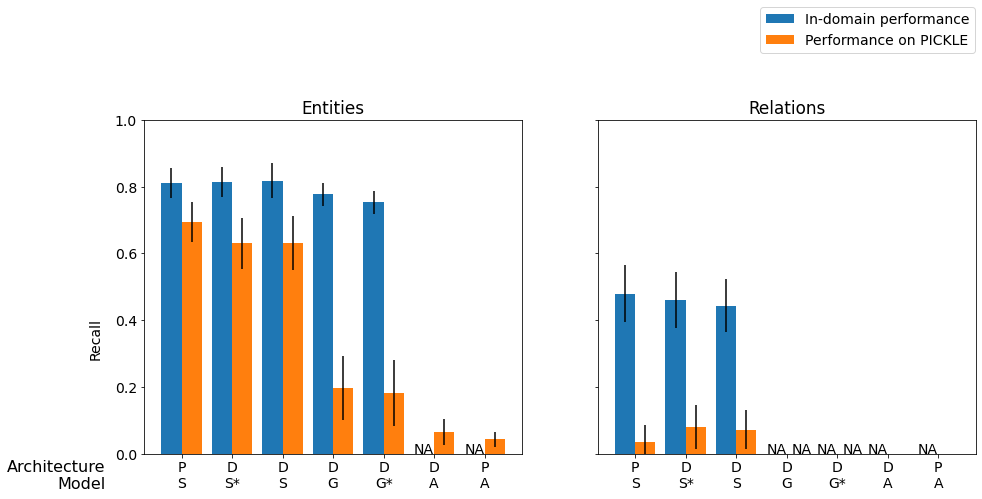

In [43]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_recall_original, 0.4, yerr=orig_ent_rec_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_recall_pickle, 0.4, yerr=pickle_ent_rec_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))

axs[1].bar(X_axis - 0.2, all_perf.rel_recall_original, 0.4, yerr=orig_rel_rec_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_recall_pickle, 0.4, yerr=pickle_rel_rec_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))
        
plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("Recall", fontsize=14)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_recall_fig_w_errorbars.png', bbox_inches='tight', dpi=600)

#### Precision

In [44]:
orig_ent_prec_intervals = get_intervals_w_nan(all_perf.ent_precision_CI_original)
orig_rel_prec_intervals = get_intervals_w_nan(all_perf.rel_precision_CI_original)
pickle_ent_prec_intervals = get_intervals_w_nan(all_perf.ent_precision_CI_pickle)
pickle_rel_prec_intervals = get_intervals_w_nan(all_perf.rel_precision_CI_pickle)

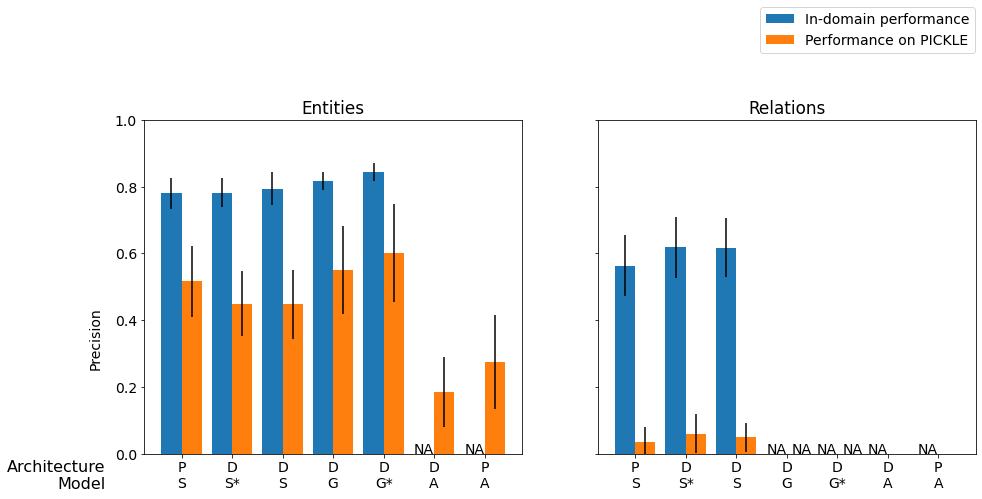

In [45]:
X_axis = np.arange(len(all_perf.index))

fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=(14,8))

axs[0].bar(X_axis - 0.2, all_perf.ent_precision_original, 0.4, yerr=orig_ent_prec_intervals, label = 'In-domain performance')
axs[0].bar(X_axis + 0.2, all_perf.ent_precision_pickle, 0.4, yerr=pickle_ent_prec_intervals, label = 'Performance on PICKLE')
axs[0].set_title('Entities')

# Add NA over bars where original domain performance couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.ent_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[0].annotate(nan_text, (xloc, 0))

axs[1].bar(X_axis - 0.2, all_perf.rel_precision_original, 0.4, yerr=orig_rel_prec_intervals, label = 'In-domain performance')
axs[1].bar(X_axis + 0.2, all_perf.rel_precision_pickle, 0.4, yerr=pickle_rel_prec_intervals, label = 'Performance on PICKLE')
axs[1].set_title('Relations')

# Add NA over bars where the model didn't have relation capabilities or original domain performance
# couldn't be evaluated
nan_text = 'NA'
for i, val in enumerate(all_perf.rel_F1_original):
    if np.isnan(val):
        xloc = X_axis[i] - 0.4
        axs[1].annotate(nan_text, (xloc, 0))
for i, val in enumerate(all_perf.rel_F1_pickle):
    if np.isnan(val):
        xloc = X_axis[i] + 0.1
        axs[1].annotate(nan_text, (xloc, 0))

plt.xticks(ticks=X_axis, labels=labels)
box_text = 'Architecture\nModel'
axs[0].text(-1.5, -0.065, box_text, ha='right', va='center',
                 size=16)
fig.supylabel("Precision", fontsize=14)
fig.subplots_adjust(bottom=0.3, left=0.075)
plt.ylim(0,1)
plt.legend(loc=(0.43,1.2))
plt.savefig('../data/straying_off_topic_data/model_performance/paper_supp_precision_fig_w_errorbars.png', bbox_inches='tight', dpi=600)